In [ ]:
import os
import shutil
import random
import sys
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
import shutil
import glob
from skimage.feature import hog # for feature extraction
from tensorflow.keras.preprocessing import image
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
Atelectasis_dir = "/content/drive/MyDrive/Data/Cardiomegaly/"
normal_dir = "/content/drive/MyDrive/Data/Normal/"

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import cv2
from keras.models import Model, Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.layers import BatchNormalization
import os
from PIL import Image
import seaborn as sns
SIZE=224

In [ ]:
train_images = []
train_labels = []
for directory_path in glob.glob('/content/drive/MyDrive/Data/resized/train/*'):
    label = directory_path.split("/")[-1]
   # print(label)
    for img_path in glob.glob(os.path.join(directory_path, "*.png")):
        #print(img_path)
        img = cv2.imread(img_path)
        img = cv2.resize(img, (SIZE, SIZE))
        #img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        train_images.append(img)
        train_labels.append(label)

train_images = np.array(train_images)
train_labels = np.array(train_labels)

In [ ]:
# test
test_images = []
test_labels = []
for directory_path in glob.glob('/content/drive/MyDrive/Data/resized/test/*'):
    fruit_label = directory_path.split("/")[-1]
    #print(label)
    for img_path in glob.glob(os.path.join(directory_path, "*.png")):
        img = cv2.imread(img_path)
        img = cv2.resize(img, (SIZE, SIZE))
        #img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        test_images.append(img)
        test_labels.append(fruit_label)

test_images = np.array(test_images)
test_labels = np.array(test_labels)

In [ ]:
#Encode labels from text to integers.
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(test_labels)
test_labels_encoded = le.transform(test_labels)
le.fit(train_labels)
train_labels_encoded = le.transform(train_labels)
#le.fit(valid_labels)
#valid_label_encoded = le.transform(valid_labels)

In [ ]:
#Split data into test and train datasets (already split but assigning to meaningful convention)
from sklearn.model_selection import train_test_split
x_train, y_train, x_test, y_test = train_images, train_labels_encoded, test_images, test_labels_encoded

In [ ]:
# Normalize pixel values to between 0 and 1
#x_train, x_test = x_train / 255.0, x_test / 255.0
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train / 255
x_test = x_test / 255

In [ ]:
from keras.utils import to_categorical
y_train_one_hot = to_categorical(y_train,2)
y_test_one_hot = to_categorical(y_test,2)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_valid,train_label,valid_label = train_test_split(x_train, y_train_one_hot, test_size=0.1, random_state=5)

In [ ]:
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
#print('x_valid shape:', x_valid.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
#print(x_valid.shape[0], 'test samples')

x_train shape: (3168, 224, 224, 3)
x_test shape: (880, 224, 224, 3)
3168 train samples
880 test samples


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

def VGG19(input_shape=(224, 224, 3)):
    model = models.Sequential()

    # Block 1
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=input_shape))
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))
    model.add(Dropout(0.4))

    # Block 2
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))
    model.add(Dropout(0.4))

    # Block 3
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))
    model.add(Dropout(0.4))

    # Block 4
    model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))
    model.add(Dropout(0.3))

    # Block 5
    model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))
    model.add(Dropout(0.3))

    # Flatten the output and add fully connected layers
    model.add(layers.Flatten())
    model.add(layers.Dense(4096, activation='relu'))
    model.add(layers.Dense(4096, activation='relu'))
    model.add(layers.Dense(2, activation='sigmoid'))  # Output layer for binary classification
    return model


In [ ]:
# Create VGG19 model for binary classification
model = VGG19()
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# Print model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 64)      0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 112, 112, 64)      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 128)     147584    
                                                        

In [ ]:
import datetime
start = datetime.datetime.now()
#Train the CNN model
history = model.fit(x_train, train_label, epochs=50,batch_size = 64, validation_data = (x_valid, valid_label))
end = datetime.datetime.now()

print("Total execution time is: ", end-start)

Epoch 1/50
50/50 [==============================] - 126s 2s/step - loss: 2.3275 - accuracy: 0.5085 - val_loss: 0.6969 - val_accuracy: 0.4545
Epoch 2/50
50/50 [==============================] - 61s 1s/step - loss: 0.6936 - accuracy: 0.5051 - val_loss: 0.6933 - val_accuracy: 0.4545
Epoch 3/50
50/50 [==============================] - 60s 1s/step - loss: 0.6932 - accuracy: 0.4848 - val_loss: 0.6933 - val_accuracy: 0.4545
Epoch 4/50
50/50 [==============================] - 60s 1s/step - loss: 0.6931 - accuracy: 0.5051 - val_loss: 0.6937 - val_accuracy: 0.4545
Epoch 5/50
50/50 [==============================] - 60s 1s/step - loss: 0.6931 - accuracy: 0.5051 - val_loss: 0.6939 - val_accuracy: 0.4545
Epoch 6/50
50/50 [==============================] - 60s 1s/step - loss: 0.6931 - accuracy: 0.5051 - val_loss: 0.6938 - val_accuracy: 0.4545
Epoch 7/50
50/50 [==============================] - 61s 1s/step - loss: 0.6931 - accuracy: 0.5051 - val_loss: 0.6939 - val_accuracy: 0.4545
Epoch 8/50
50/50 [=

In [ ]:
#model.save("CLAHE_After_Processing_Final.h5")

In [ ]:
#test_eval = feature_extractor.evaluate(x_test, y_test_one_hot, verbose=1)
score = model.evaluate(x_test, y_test_one_hot, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [ ]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(2, len(loss) + 2)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
#test_eval = feature_extractor.evaluate(x_test, y_test_one_hot, verbose=1)
score = model.evaluate(x_train, train_label, verbose=1)
print('Train loss:', score[0])
print('Train accuracy:', score[1])

In [ ]:
#Validation
score = model.evaluate(x_valid, valid_label, verbose=1)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])

In [ ]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [ ]:
prediction_NN = model.predict(x_test)
prediction_NN = np.argmax(prediction_NN, axis=1)
prediction_NN = le.inverse_transform(prediction_NN)

In [ ]:
#Confusion Matrix - verify accuracy of each class
from sklearn.metrics import confusion_matrix
nClasses = ['Cardiomegaly','Normal']
plt.figure(figsize=(3,3))
cm = confusion_matrix(test_labels, prediction_NN)
print(cm)
plt.title('Confusion Matrix')
#sns.heatmap(cm, annot=True)
#sns.heatmap(cm, cbar=False, xticklabels=classes, yticklabels=classes, fmt='d', annot=True, cmap=plt.cm.Blues)
sns.heatmap(cm, cbar=False, xticklabels=nClasses, yticklabels=nClasses, fmt='d', annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
#target_names = ["Class {}".format(i) for i in range(num_classes)]
#plt.title('Classification Report Before Image Preprocessing')
print(classification_report(test_labels, prediction_NN, target_names=['Cardiomegaly  (Class 0)','Normal (Class 1)']))

In [ ]:
predicted_classes = cnn_model.predict(x_test)

32/32 [==============================] - 0s 8ms/step


In [ ]:
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
predicted_classes.shape, y_test.shape

((1000,), (1000,))

Found 990 correct labels


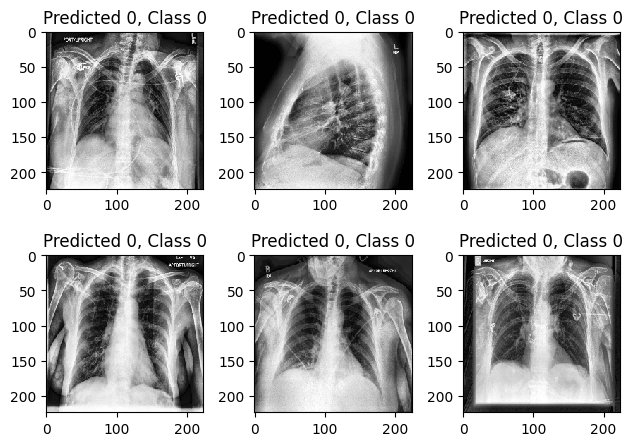

In [ ]:
correct = np.where(predicted_classes==y_test)[0]
print ("Found %d correct labels" % len(correct))
for i, correct in enumerate(correct[:6]):
    plt.subplot(2,3,i+1)
    plt.imshow(x_test[correct], cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))
    plt.tight_layout()

Found 10 incorrect labels


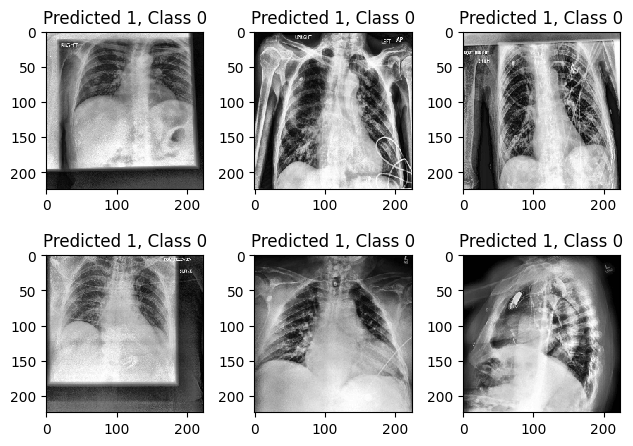

In [ ]:
incorrect = np.where(predicted_classes!=y_test)[0]
print ("Found %d incorrect labels" % len(incorrect))
for i, incorrect in enumerate(incorrect[:6]):
    plt.subplot(2,3,i+1)
    plt.imshow(x_test[incorrect], cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))
    plt.tight_layout()